In [3]:
%config ZMQInteractiveShell.ast_node_interactivity="all"

***

## Pandas第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

## 作业

##### 说明：我们下面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。


#### 1.构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。


In [4]:
import pandas as pd

a = pd.Series([10.5,13,21],name="单价")
b = pd.Series(["只","个","千克"],name="计量单位")
c = pd.Series([2,4,2],name="数量")

a
b
c 

0    10.5
1    13.0
2    21.0
Name: 单价, dtype: float64

0     只
1     个
2    千克
Name: 计量单位, dtype: object

0    2
1    4
2    2
Name: 数量, dtype: int64

#### 2.然后把这三个Series合并成一个DataFrame

In [5]:
data = pd.DataFrame({"单价":a,"计量单位":b,"数量":c})
data

,单价,计量单位,数量
0,10.5,只,2
1,13.0,个,4
2,21.0,千克,2


#### 3.请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图


In [175]:
baba = pd.read_csv("../../../Downloads/BABA.csv",index_col = "Date",parse_dates=[0])
baba.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-15,188.059998,188.169998,182.559998,183.070007,183.070007,14616600
2019-04-16,185.550003,185.789993,183.399994,185.779999,185.779999,12195900
2019-04-17,187.339996,188.199997,185.779999,187.550003,187.550003,11614200
2019-04-18,186.410004,187.279999,185.389999,186.940002,186.940002,7882500
2019-04-22,184.500000,186.470001,183.610001,185.380005,185.380005,8677800


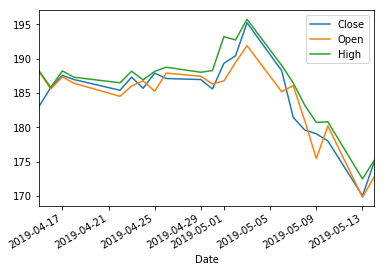

In [173]:
%matplotlib inline
baba[["Close","Open","High"]].plot()

#### 4. 0.Teacher/data/文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存活情况。请把这个文件读入成一个pandas dataframe

In [153]:
tidata = pd.read_csv("../../../Downloads/titanic.csv")
tidata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5.把每一列中的sex，sex为male的都改成1，sex为female的改成0,

In [155]:
# tidata["Sex"][tidata["Sex"] == "male"] = 1
# tidata["Sex"][tidata["Sex"] == "female"] = 0

# tidata.head()

sex_mapDict={'male':1,
            'female':0}
tidata['Sex']=tidata['Sex'].map(sex_mapDict)
tidata.head()

/Users/juschao/anaconda3/envs/py35/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/Users/juschao/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/juschao/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### 6.把Cabin中的NaN都填充成0 (使用fillna方法)

In [156]:
tidata = tidata.fillna({"Cabin":0})
tidata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


#### 7.现在我们想把乘客按照年龄做一个分类
- 年龄在0-11岁的为0类,12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类
- 请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄


In [162]:
tidata = tidata.fillna({"Age":int(tidata["Age"].mean())})

def cls(x):
    if x >0 and x <= 11:
        return 0 
    elif x >=12 and x <= 22:
        return 1 
    elif x >=23 and x <= 33:
        return 2 
    elif x >=34 and x <= 44:
        return 3 
    elif x >=45 and x <= 55:
        return 4 
    elif x >=56 and x <= 66:
        return 5
    else:
        return 6
tidata["Age"] = tidata["Age"].map(cls)

tidata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,0,S
